## 第9章EM算法及其推广-习题
### 习题9.1

&emsp;&emsp;如例9.1的三硬币模型，假设观测数据不变，试选择不同的处置，例如，$\pi^{(0)}=0.46,p^{(0)}=0.55,q^{(0)}=0.67$，求模型参数为$\theta=(\pi,p,q)$的极大似然估计。  

**解答：**

In [1]:
import numpy as np
import math

class EM:
    def __init__(self, prob):
        self.pro_A, self.pro_B, self.pro_C = prob
        
    def pmf(self, i):
        pro_1 = self.pro_A * math.pow(self.pro_B, data[i]) * math.pow((1-self.pro_B), 1-data[i])
        pro_2 = (1 - self.pro_A) * math.pow(self.pro_C, data[i]) * math.pow((1-self.pro_C), 1-data[i])
        return pro_1 / (pro_1 + pro_2)
    
    def fit(self, data):
        print('init prob:{}, {}, {}'.format(self.pro_A, self.pro_B, self.pro_C))
        count = len(data)
        theta = 1
        d = 0
        while(theta > 0.00001):
            # 迭代阻塞
            _pmf = [self.pmf(k) for k in range(count)]
            pro_A = 1/ count * sum(_pmf)
            pro_B = sum([_pmf[k]*data[k] for k in range(count)]) / sum([_pmf[k] for k in range(count)])
            pro_C = sum([(1-_pmf[k])*data[k] for k in range(count)]) / sum([(1-_pmf[k]) for k in range(count)])
            d += 1
            print('{}  pro_a:{:.4f}, pro_b:{:.4f}, pro_c:{:.4f}'.format(d, pro_A, pro_B, pro_C))
            theta = abs(self.pro_A-pro_A) + abs(self.pro_B-pro_B) + abs(self.pro_C-pro_C)
            self.pro_A = pro_A
            self.pro_B = pro_B
            self.pro_C = pro_C

In [2]:
# 加载数据
data=[1,1,0,1,0,0,1,0,1,1]

em = EM(prob=[0.46, 0.55, 0.67])
f = em.fit(data)

init prob:0.46, 0.55, 0.67
1  pro_a:0.4619, pro_b:0.5346, pro_c:0.6561
2  pro_a:0.4619, pro_b:0.5346, pro_c:0.6561


可见通过两次迭代，参数已经收敛，三个硬币的概率分别为0.4619，0.5346，0.6561

### 习题9.2
证明引理9.2。

> **引理9.2：**若$\tilde{P}_{\theta}(Z)=P(Z | Y, \theta)$，则$$F(\tilde{P}, \theta)=\log P(Y|\theta)$$

**证明：**  
由$F$函数的定义（**定义9.3**）可得：$$F(\tilde{P}, \theta)=E_{\tilde{P}}[\log P(Y,Z|\theta)] + H(\tilde{P})$$其中，$H(\tilde{P})=-E_{\tilde{P}} \log \tilde{P}(Z)$  
$\begin{aligned}
\therefore F(\tilde{P}, \theta) 
&= E_{\tilde{P}}[\log P(Y,Z|\theta)] -E_{\tilde{P}} \log \tilde{P}(Z) \\
&= \sum_Z \log P(Y,Z|\theta) \tilde{P}_{\theta}(Z) - \sum_Z \log \tilde{P}(Z) \cdot \tilde{P}(Z) \\
&= \sum_Z \log P(Y,Z|\theta) P(Z|Y,\theta) -  \sum_Z \log P(Z|Y,\theta) \cdot P(Z|Y,\theta) \\
&= \sum_Z P(Z|Y,\theta) \left[ \log P(Y,Z|\theta) - \log P(Z|Y,\theta) \right] \\
&= \sum_Z P(Z|Y,\theta) \log \frac{P(Y,Z|\theta)}{P(Z|Y,\theta)} \\
&= \sum_Z P(Z|Y,\theta) \log P(Y|\theta) \\
&= \log P(Y|\theta) \sum_Z P(Z|Y,\theta)
\end{aligned}$  
$\displaystyle \because \sum_Z \tilde{P}_{\theta}(Z) = P(Z|Y, \theta) = 1$  
$\therefore F(\tilde{P}, \theta) = \log P(Y|\theta)$，引理9.2得证。

### 习题9.3
已知观测数据  
-67，-48，6，8，14，16，23，24，28，29，41，49，56，60，75  
试估计两个分量的高斯混合模型的5个参数。

**解答：**

In [3]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# 初始化观测数据
data=np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60, 75]).reshape(-1, 1)

# 聚类
gmmModel = GaussianMixture(n_components=2)
gmmModel.fit(data)
labels = gmmModel.predict(data)
print("labels =", labels)

labels = [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


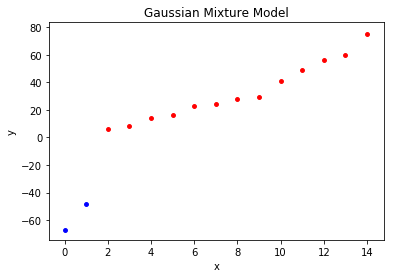

means = [[ 32.98489643 -57.51107027]]
covariances = [[429.45764867  90.24987882]]
weights =  [[0.86682762 0.13317238]]


In [4]:
for i in range(0,len(labels)):
    if labels[i] == 0:
        plt.scatter(i, data.take(i), s=15, c='red')
    elif labels[i] == 1:
        plt.scatter(i, data.take(i), s=15, c='blue')
plt.title('Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("means =", gmmModel.means_.reshape(1, -1))
print("covariances =", gmmModel.covariances_.reshape(1, -1))
print("weights = ", gmmModel.weights_.reshape(1, -1))

### 习题9.4
&emsp;&emsp;EM算法可以用到朴素贝叶斯法的非监督学习，试写出其算法。

**解答：** 
> **EM算法的一般化：**  
**E步骤：**根据参数初始化或上一次迭代的模型参数来计算出隐变量的后验概率，其实就是隐变量的期望。作为隐变量的现估计值：$$w_j^{(i)}=Q_{i}(z^{(i)}=j) := p(z^{(i)}=j | x^{(i)} ; \theta)$$
**M步骤：**将似然函数最大化以获得新的参数值：$$
\theta :=\arg \max_{\theta} \sum_i \sum_{z^{(i)}} Q_i (z^{(i)}) \log \frac{p(x^{(i)}, z^{(i)} ; \theta)}{Q_i (z^{(i)})}
$$  

使用NBMM（朴素贝叶斯的混合模型）中的$\phi_z,\phi_{j|z^{(i)}=1},\phi_{j|z^{(i)}=0}$参数替换一般化的EM算法中的$\theta$参数，然后依次求解$w_j^{(i)}$与$\phi_z,\phi_{j|z^{(i)}=1},\phi_{j|z^{(i)}=0}$参数的更新问题。  
**NBMM的EM算法：**  
**E步骤：**  
$$w_j^{(i)}:=P\left(z^{(i)}=1 | x^{(i)} ; \phi_z, \phi_{j | z^{(i)}=1}, \phi_{j | z^{(i)}=0}\right)$$**M步骤：**$$
\phi_{j | z^{(i)}=1} :=\frac{\displaystyle \sum_{i=1}^{m} w^{(i)} I(x_{j}^{(i)}=1)}{\displaystyle \sum_{i=1}^{m} w^{(i)}} \\ 
\phi_{j | z^{(i)}=0}:= \frac{\displaystyle  \sum_{i=1}^{m}\left(1-w^{(i)}\right) I(x_{j}^{(i)}=1)}{ \displaystyle \sum_{i=1}^{m}\left(1-w^{(i)}\right)} \\ 
\phi_{z^{(i)}} :=\frac{\displaystyle \sum_{i=1}^{m} w^{(i)}}{m} 
$$   